In [3]:
# Hoje
# vamos usar os dados do projeto Serenata de amor para esse curso
# para saber mais do projeto, acesse esse link:
# https://serenatadeamor.org/
# Correlation is bad: http://www.tylervigen.com/spurious-correlations

from serenata_toolbox.datasets import Datasets
dataset_dir = '/dados/'

In [2]:
from serenata_toolbox.federal_senate.federal_senate_dataset import FederalSenateDataset

senate = FederalSenateDataset(dataset_dir)
senate.fetch()
senate.translate()
senate.clean()

'/Users/tarsis/projetos/pessoal/python-data-analisys-tutorial/serenata/datasets/federal-senate-reimbursements.xz'

In [4]:
# Vamos analisar os dados dos nossos senadores no ano de 2016
import pandas
from pandas import DataFrame
df = pandas.read_csv(dataset_dir+"federal-senate-2016")

In [9]:
# as informações que temos disponiveis são:
print(df.columns)
print('-----')
print(df.shape)
print('-----')
print(df.dtypes)

Index(['year', 'month', 'congressperson_name', 'expense_type', 'cnpj_cpf',
       'supplier', 'document_id', 'date', 'expense_details',
       'reimbursement_value'],
      dtype='object')
-----
(26691, 10)
-----
year                    int64
month                   int64
congressperson_name    object
expense_type           object
cnpj_cpf               object
supplier               object
document_id            object
date                   object
expense_details        object
reimbursement_value    object
dtype: object


In [10]:
# os dados estão estruturados assim:
df.head()

,year,month,congressperson_name,expense_type,cnpj_cpf,supplier,document_id,date,expense_details,reimbursement_value
0,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,13/01/2016,Despesa com pagamento de energia elétrica para...,"73,6"
1,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,18/01/2016,Pagamento de energia elétrica para o escritóri...,"206,84"
2,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,04/01/2016,"Despesa com pagamento de aluguel, utilizado pa...",6000
3,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.423.963/0001-11,OI MÓVEL S.A.,661639001,16/01/2016,despesa com pagamento de telefonia para o escr...,"407,48"
4,2016,1,ACIR GURGACZ,Acquisition of consumables for use in the poli...,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,06/01/2016,Aquisição de publicação virtual de conteúdo jo...,550


In [11]:
# vamos tratar os dados:
# os dados de reimbursement_value tem um problema: eles não estão normalizados
# temos dados numerico com `,`, uma e duas casas decimais e numeros sem casas decimais
# vamos trata-los para que eles virem dados do tipo float64.
df['reimbursement_value']

0           73,6
1         206,84
2           6000
3         407,48
4            550
5             40
6        1218,76
7        1761,34
8         451,18
9          923,3
10        373,01
11        552,74
12       1276,43
13       1469,05
14         72,59
15         315,6
16          6000
17        439,96
18           550
19           300
20       1308,48
21        754,25
22        826,24
23        862,97
24       1280,42
25          1655
26        758,04
27       1134,54
28       1305,35
29          71,1
          ...   
26661     145,57
26662         50
26663        176
26664        100
26665     271,41
26666     195,39
26667     160,96
26668         90
26669       1160
26670       1974
26671      894,6
26672     1597,5
26673    2440,32
26674    1249,56
26675        100
26676        200
26677        230
26678     245,52
26679     213,25
26680     251,93
26681     239,93
26682     222,58
26683        100
26684      23,04
26685        100
26686      183,4
26687         50
26688    1055,

In [12]:
# primeiro vemos que o tipo da Serie no dataframe é object
# então temos que trasnforma-la em string e depois fazer o replace de `,` para `.`
df.reimbursement_value = df.reimbursement_value.str.replace(",", ".")

In [13]:
# agora podemos transformar os dados em float, finalmente
df.reimbursement_value = df.reimbursement_value.astype(float)

In [14]:
df.reimbursement_value

0          73.60
1         206.84
2        6000.00
3         407.48
4         550.00
5          40.00
6        1218.76
7        1761.34
8         451.18
9         923.30
10        373.01
11        552.74
12       1276.43
13       1469.05
14         72.59
15        315.60
16       6000.00
17        439.96
18        550.00
19        300.00
20       1308.48
21        754.25
22        826.24
23        862.97
24       1280.42
25       1655.00
26        758.04
27       1134.54
28       1305.35
29         71.10
          ...   
26661     145.57
26662      50.00
26663     176.00
26664     100.00
26665     271.41
26666     195.39
26667     160.96
26668      90.00
26669    1160.00
26670    1974.00
26671     894.60
26672    1597.50
26673    2440.32
26674    1249.56
26675     100.00
26676     200.00
26677     230.00
26678     245.52
26679     213.25
26680     251.93
26681     239.93
26682     222.58
26683     100.00
26684      23.04
26685     100.00
26686     183.40
26687      50.00
26688    1055.

In [15]:
# vamos transformar a data para timestamp do pandas
df.date = df.date.apply(pandas.to_datetime, format="%d/%m/%Y", errors="ignore")
df.date

0        2016-01-13 00:00:00
1        2016-01-18 00:00:00
2        2016-01-04 00:00:00
3        2016-01-16 00:00:00
4        2016-01-06 00:00:00
5        2016-01-13 00:00:00
6        2016-01-19 00:00:00
7        2016-01-19 00:00:00
8        2016-01-21 00:00:00
9        2016-01-21 00:00:00
10       2016-01-25 00:00:00
11       2016-01-08 00:00:00
12       2016-01-14 00:00:00
13       2016-01-18 00:00:00
14       2016-02-15 00:00:00
15       2016-02-18 00:00:00
16       2016-02-03 00:00:00
17       2016-02-06 00:00:00
18       2016-02-02 00:00:00
19       2016-02-15 00:00:00
20       2016-02-11 00:00:00
21       2016-02-26 00:00:00
22       2016-02-29 00:00:00
23       2016-02-29 00:00:00
24       2016-02-29 00:00:00
25       2016-02-01 00:00:00
26       2016-02-29 00:00:00
27       2016-02-22 00:00:00
28       2016-02-25 00:00:00
29       2016-03-08 00:00:00
                ...         
26661    2016-12-23 00:00:00
26662    2016-12-10 00:00:00
26663    2016-12-24 00:00:00
26664    2016-

In [16]:
df.dtypes

year                     int64
month                    int64
congressperson_name     object
expense_type            object
cnpj_cpf                object
supplier                object
document_id             object
date                    object
expense_details         object
reimbursement_value    float64
dtype: object

In [17]:
# media dos valores?
df.reimbursement_value.mean()

947.48451313176724

In [35]:
df.reimbursement_value.median()

324.79

In [ ]:
# desvio padrão?
df.reimbursement_value.std()

In [ ]:
# variancia?
df.reimbursement_value.var()

In [ ]:
# valor minimo e maximo do reembolso
print(df.reimbursement_value.max()) # Que reembolso é esse?!?!
print(df.reimbursement_value.min())

In [19]:
# existe uma função que já traz todas essas estatisticas juntas
df.reimbursement_value.describe()

count     26691.000000
mean        947.484513
std        2733.820037
min           0.010000
25%         124.000000
50%         324.790000
75%         956.865000
max      256980.000000
Name: reimbursement_value, dtype: float64

In [20]:
df.reimbursement_value.sort_values(ascending=False)

4637     256980.00
22892     80000.00
26656     80000.00
22709     79680.00
22878     78000.00
22893     72000.00
16241     61600.00
8401      44500.00
3522      40000.00
25611     40000.00
8856      35000.00
5818      33000.00
16225     30000.00
16227     30000.00
16228     30000.00
16240     30000.00
16230     30000.00
16231     30000.00
16234     30000.00
8658      30000.00
16236     30000.00
16229     30000.00
16226     30000.00
24411     30000.00
7360      28922.72
1463      28000.00
7377      27655.07
7376      27655.07
7374      27655.07
7371      27655.07
           ...    
9554          4.76
18478         4.32
17671         4.30
17672         4.30
2027          4.08
17582         3.60
17673         3.10
17670         3.10
3713          3.00
20658         2.95
26203         2.65
17683         2.40
17789         2.40
17790         2.40
17969         2.30
17970         2.30
18041         2.30
17273         1.70
17388         0.97
13507         0.90
23616         0.90
17963       

In [21]:
# menor gasto de um senador.
df.loc[6848]

year                                                                2016
month                                                                  3
congressperson_name                              FERNANDO BEZERRA COELHO
expense_type                      National air, water and land transport
cnpj_cpf                                              07.575.651/0001-59
supplier                                                             GOL
document_id                                                       OEI85P
date                                                 2016-03-30 00:00:00
expense_details        Companhia Aérea: GOL, Localizador: OEI85P. Pas...
reimbursement_value                                                 0.01
Name: 6848, dtype: object

In [22]:
# maior gasto de um senador.
df.loc[4637]

year                                                        2016
month                                                         12
congressperson_name                              DAVI ALCOLUMBRE
expense_type                 Publicity of parliamentary activity
cnpj_cpf                                      04.953.008/0001-23
supplier               ARTE & IMAGEM GRAFICA E EDITORA EIRELI ME
document_id                                                  202
date                                         2017-03-22 00:00:00
expense_details                                              NaN
reimbursement_value                                       256980
Name: 4637, dtype: object

In [23]:
# ok, vimos alguams estatisticas da distribuição, mas isso não quer dizer muita coisa.
# vamos gerar alguns graficos para entender mais desses valores.
import matplotlib as plt
% matplotlib inline
plt.style.use('ggplot') 

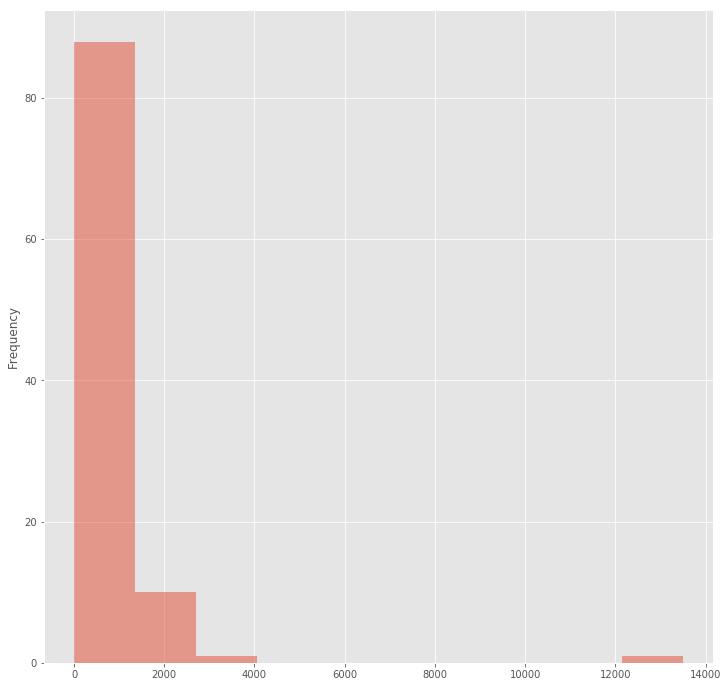

In [24]:
# vamos olhar a distribuição dos valores de reembolso
# um histograma é a melhor forma de ver a frequencia dos valores numa distribuição
# o valor que mais aparece é a "moda" da distribuição

df.sample(n=100).reimbursement_value.plot.hist(alpha=0.5, figsize=(12,12))

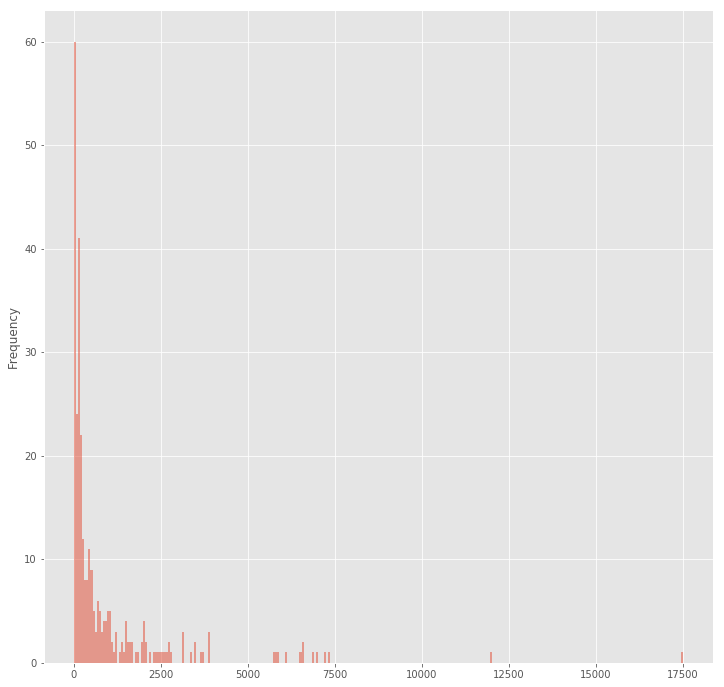

In [33]:
# o parametro `bins` é a quantidade ranges que queremos agrupar os dados. muito baixo pode esconder picos.
df.sample(n=300).reimbursement_value.plot.hist(alpha=0.5, bins=300, figsize=(12, 12))

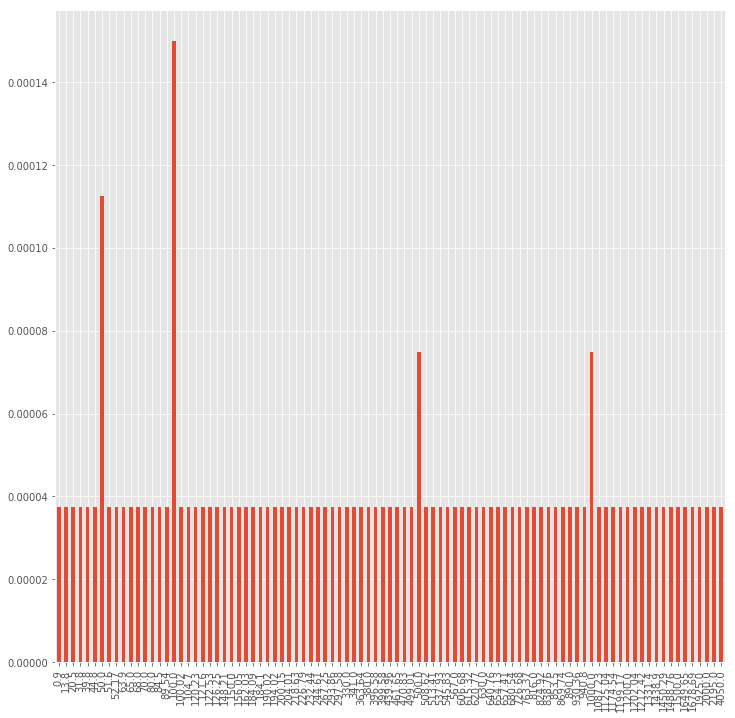

In [34]:
# PMF (Probability Mass Function): 
# é a função que define a probabilidade de você pegar um valor randomico na distribuição

pmf = df.sample(n=100).reimbursement_value.value_counts().sort_index() / len(df)
pmf.plot(kind='bar', figsize=(12, 12))

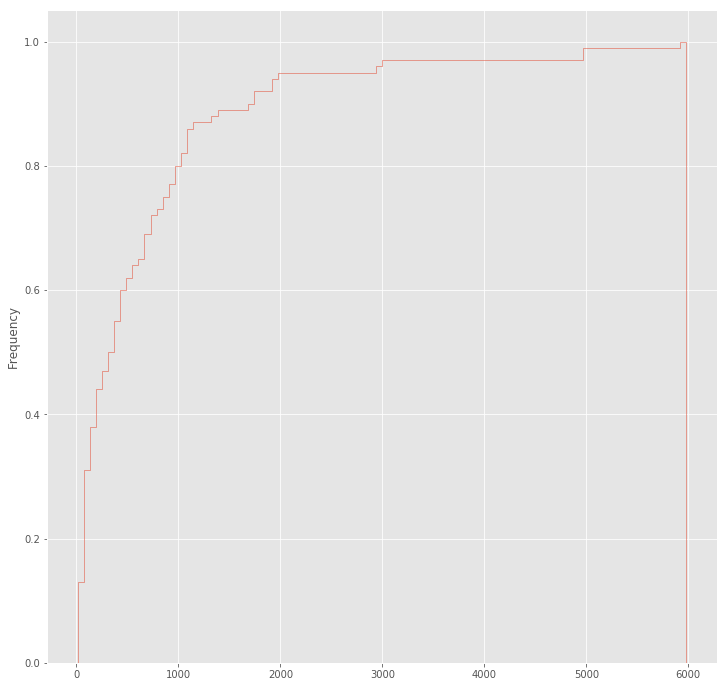

In [35]:
# CDF: dado um valor X qual a probabilidade de pegar um valor menor ou igual a X

df.sample(n=100).reimbursement_value.plot.hist(cumulative=True, normed=1, bins=100, histtype='step', figsize=(12,12))

## Interludio: aplicando num problema mais proximo

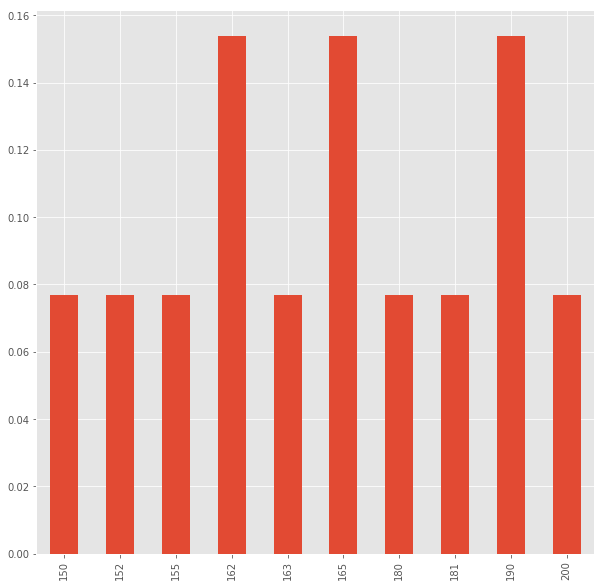

In [36]:
# Pausa: vamos fazer o PMF e o CDF das alturas na turma
alturas = pandas.Series([155, 150, 180, 190, 152, 162, 165, 181, 190, 200, 165, 162, 163])
pmf_alturas = alturas.value_counts().sort_index() / len(alturas)
pmf_alturas.plot(kind='bar', figsize=(10, 10))

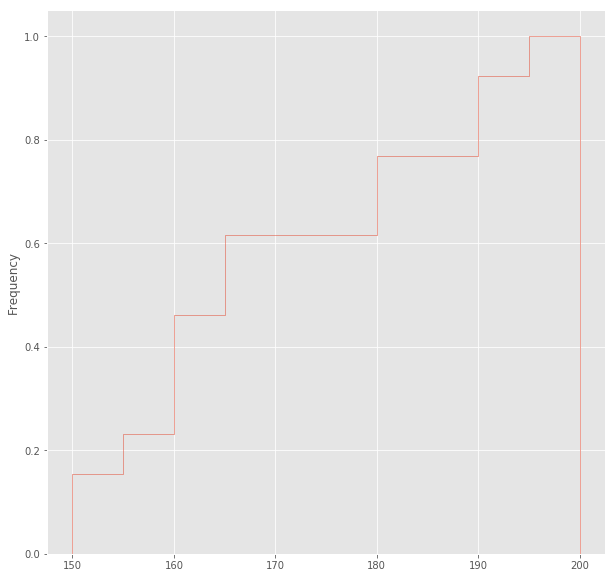

In [37]:
alturas.plot.hist(cumulative=True, normed=1, histtype='step', figsize=(10,10))

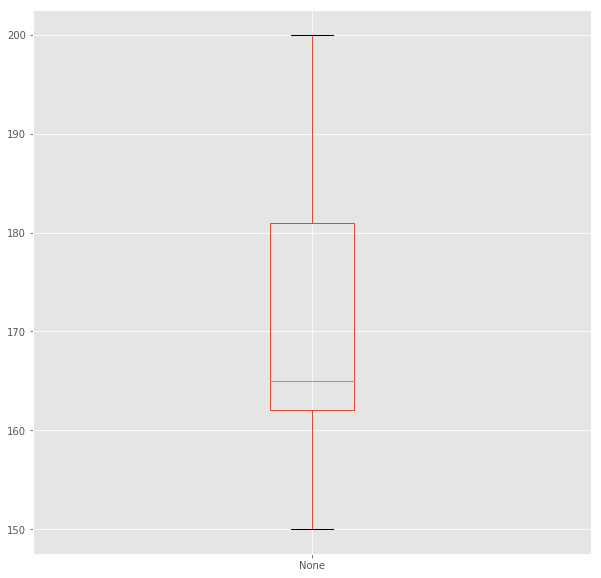

In [38]:
alturas.plot(kind="box", figsize=(10, 10))

## Voltemos aos nobres senadores

In [39]:
# Percentil Rank de um valor
# valor de um rank
# interquartile
# explicar o que esses quartis mostram dos dados / diferença entre media e mediana

def percentil_rank(values, value):
    count = 0
    for v in values:
        if v <= value:
            count += 1
    return 100 * count / len(values)

p = percentil_rank(df.reimbursement_value, 50000)
print(p)
r = df.reimbursement_value.quantile(0.5)
print(r)

99.9737739312877
324.79


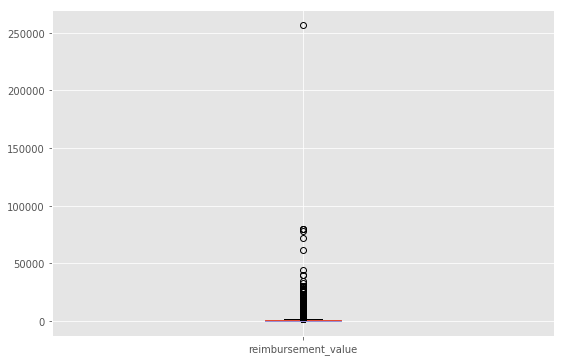

In [40]:
# vamos verificar o spread dessa distribuição 
df.reimbursement_value.plot(kind="box", figsize=(9,6))

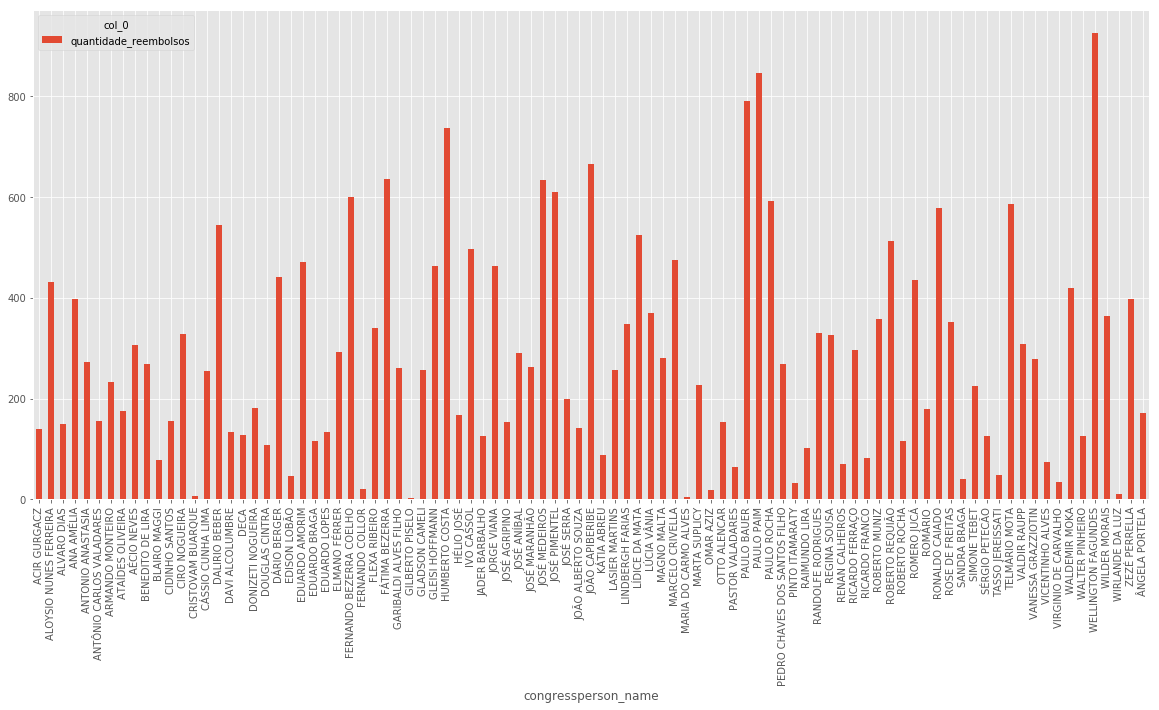

In [41]:
# tabela de frequencia
reembolsos = pandas.crosstab(index=df["congressperson_name"], columns="quantidade_reembolsos")
s = reembolsos/reembolsos.sum()
reembolsos.plot(kind="bar", figsize=(20,9))

In [55]:
df.groupby("congressperson_name")["reimbursement_value"].sum().idxmax()

'DAVI ALCOLUMBRE'

In [56]:
reembolsos.loc[reembolsos.idxmax()]

col_0,quantidade_reembolsos
congressperson_name,
WELLINGTON FAGUNDES,925


In [57]:
df[df["congressperson_name"] == reembolsos.idxmax()[0]]['reimbursement_value'].sum()

415154.22999999998

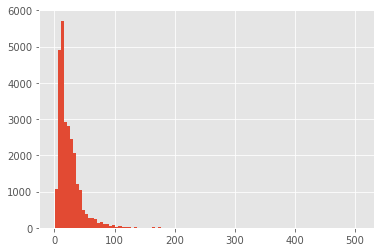

In [58]:
# quando sua distribuição é tem uma calda a direita, ou seja, é positiva
# você pode ter muitos dados outliers que podem atrapalhar analises
# pra normaliza-la você pode tirar a raiz quadrada desses valores e diminuir sua calda

import numpy
dist_sqrt = df.reimbursement_value.apply(numpy.sqrt)
dist_log = df.reimbursement_value.apply(numpy.log)
dist_sqrt.hist(bins=100)

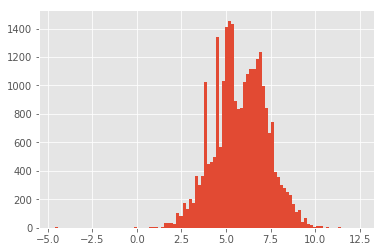

In [59]:
dist_log = df.reimbursement_value.apply(numpy.log)
dist_log.hist(bins=100)

## distribuição normal?

In [61]:
# teste se a distribuição é normal. explicar
import scipy.stats as stats
stats.mstats.normaltest(dist_sqrt)

NormaltestResult(statistic=20006.754082531857, pvalue=0.0)

In [62]:
stats.mstats.normaltest(dist_log)

NormaltestResult(statistic=158.89866034515862, pvalue=3.1303602138024094e-35)

In [63]:
dist_log.describe()

count    26691.000000
mean         5.801570
std          1.474029
min         -4.605170
25%          4.820282
50%          5.783179
75%          6.863662
max         12.456754
Name: reimbursement_value, dtype: float64

In [67]:
dist_log.median()

5.783178819636217

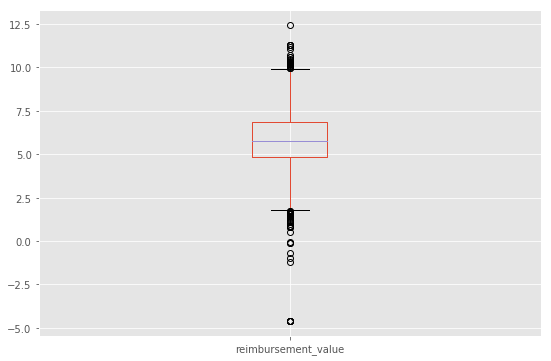

In [64]:
dist_log.plot(kind="box", figsize=(9,6))

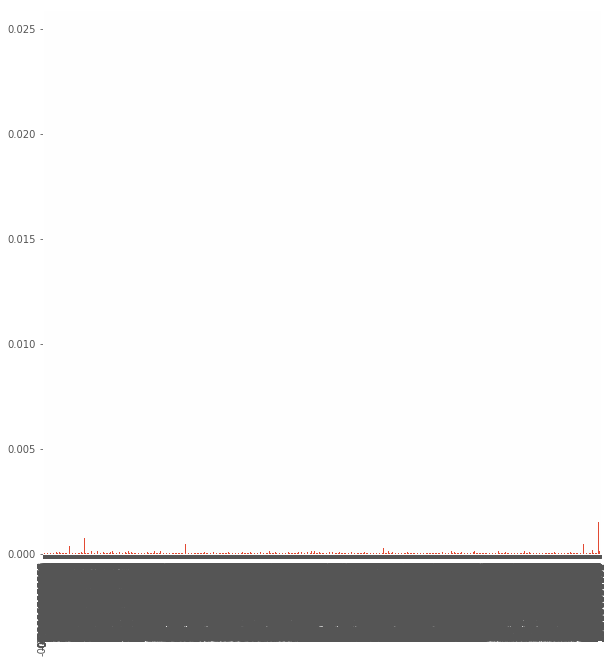

In [66]:
pmf = dist_log.value_counts().sort_index() / len(df)
pmf.plot(kind='bar', figsize=(10,10))

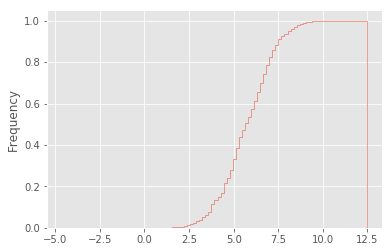

In [43]:
dist_log.plot.hist(cumulative=True, normed=1, bins=100, histtype='step')

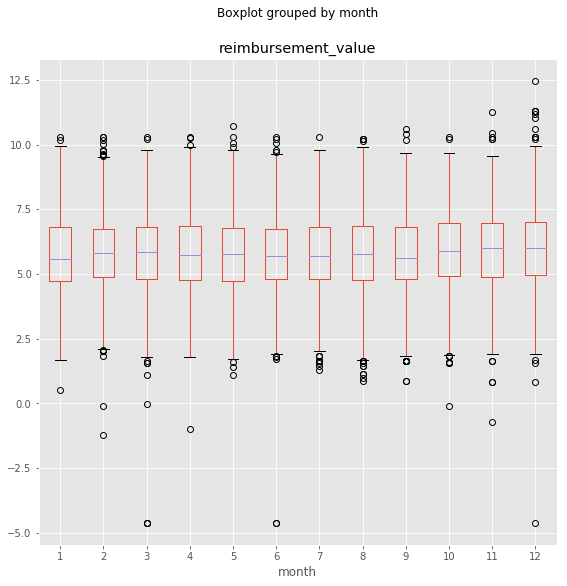

In [44]:
# com esse grafico podemos observar a distribuição dos gastos por mês dos senadores
df_log = df.copy()
df_log['reimbursement_value'] = dist_log
df_log.boxplot(column="reimbursement_value", by="month", figsize=(9,9))

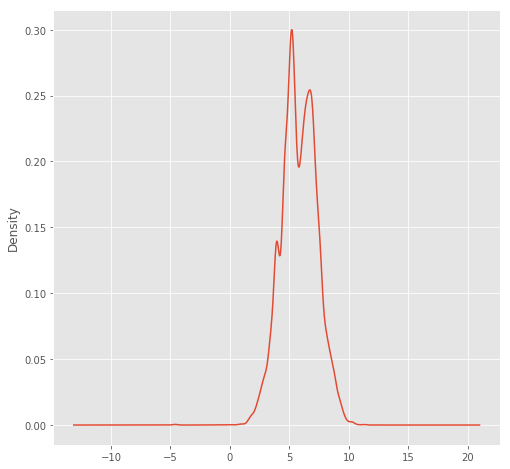

In [45]:
# grafico de densidade mostra a distribuição sem valores discretos, melhor pra ver a forma da distribuição.
dist_log.plot(kind="density", figsize=(8,8))

## bootstraping

In [28]:
# bootstraping explicar
import numpy as np
def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = X[resample_i]
    return X_resample

bootstraping = []
for i in range(100):
    bootstraping.append(bootstrap_resample(df.reimbursement_value, n=2610).mean())

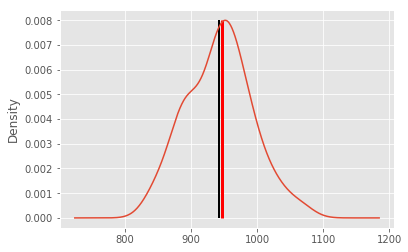

In [33]:
import matplotlib.pyplot as pyplot
x = pandas.Series(bootstraping)
x.plot(kind="density")
pyplot.vlines(x.mean(),# Plot black line at mean
              ymin=0,
              ymax=0.008,
              linewidth=2.0)

pyplot.vlines(x.median(),   # Plot red line at median
            linewidth=3.0,
            ymin=0,
            ymax=0.008,
            color="red")

In [34]:
stats.mstats.normaltest(x)

NameError: name 'stats' is not defined